In [3]:
from experiments import experiments
from agents import DQNAgent
from environments import DelaySampleToMatchEnv
from eval_scripts import prepare_data
import numpy as np
import matplotlib.pyplot as plt


def move_tuple_to_device(hidden_tuple, device):
    return (hidden_tuple[0].to(device), hidden_tuple[1].to(device))


experiment = experiments[('short-seq', 'cifar10-seq', 'MSELoss', 'LSTM')]
env = DelaySampleToMatchEnv(n_stimuli=experiment['action_size'] - 1)
agent = DQNAgent(experiment)

agent.load_model('eval')

agent.epsilon = 0.00

print(agent.q_network)

n_episodes = 10
win_pct_list = []
scores = []
hids = []

train_data, class_dct = prepare_data()

for i in range(n_episodes):
    done = False
    state = env.reset()  # Reset the environment
    indices = class_dct[int(state)]
    random_index = np.random.choice(indices)
    state = train_data[random_index].flatten()
    score = 0
    hidden = agent.q_network.init_hidden()
    if isinstance(hidden, tuple):
        hidden = move_tuple_to_device(hidden, agent.device)
    else:
        hidden = hidden.to(agent.device)
    while not done:
        action, next_hidden = agent.select_action(state, hidden)
        next_state, reward, done, info = env.step(action)  # Take the action
        indices = class_dct[int(next_state)]
        random_index = np.random.choice(indices)
        next_state = train_data[random_index].flatten()
        hidden = next_hidden
        # hids.append(hidden)
        state = next_state  # Move to the next state
        score += reward
        if isinstance(hidden, tuple):
            hids.append(hidden[0].detach().cpu().numpy())
        else:
            hids.append(hidden.detach().cpu().numpy())


hids = np.array(hids).squeeze(1).squeeze(1)
print(hids.shape)
print(hids)


LSTMQNetwork(
  (rnn): LSTM(10, 64)
  (fc): Linear(in_features=64, out_features=6, bias=True)
)
(120, 64)
[[ 4.1099142e-05 -8.9306023e-04  1.9430277e-15 ...  2.1190812e-05
   1.9165415e-04  7.6156002e-01]
 [ 1.2249841e-09 -9.3856782e-01 -1.7103329e-12 ...  9.1704478e-06
   9.4603001e-06 -1.4273583e-05]
 [-4.3286690e-03 -7.6372427e-01 -5.0514530e-02 ...  9.3791001e-03
   1.9491074e-04 -1.1546189e-05]
 ...
 [-3.0735922e-01 -8.9698642e-01 -7.5612408e-01 ...  9.0433910e-02
   1.7916229e-01  9.2682132e-04]
 [ 2.1368060e-04 -7.6416212e-01  7.4567193e-01 ...  8.6476445e-01
   1.1624931e-03  9.1510598e-04]
 [-1.5266498e-03 -5.9792256e-01  9.4351165e-02 ...  9.8022568e-01
   2.4995546e-01  1.2469969e-03]]


(64, 120)
2024-07-24 16:52:17,942 [INFO] normalizing data across axis=1
2024-07-24 16:52:17,942 [INFO] projecting out mean along axis=0
2024-07-24 16:52:17,944 [INFO] data normalized, 0.00sec
2024-07-24 16:52:17,945 [INFO] sorting activity: 64 valid samples by 100 timepoints
2024-07-24 16:52:17,966 [INFO] n_PCs = 10 computed, 0.02sec
2024-07-24 16:52:17,984 [INFO] 5 clusters computed, time 0.04sec
2024-07-24 16:52:17,991 [INFO] clusters sorted, time 0.05sec
2024-07-24 16:52:18,030 [INFO] clusters upsampled, time 0.09sec
2024-07-24 16:52:18,033 [INFO] rastermap complete, time 0.09sec


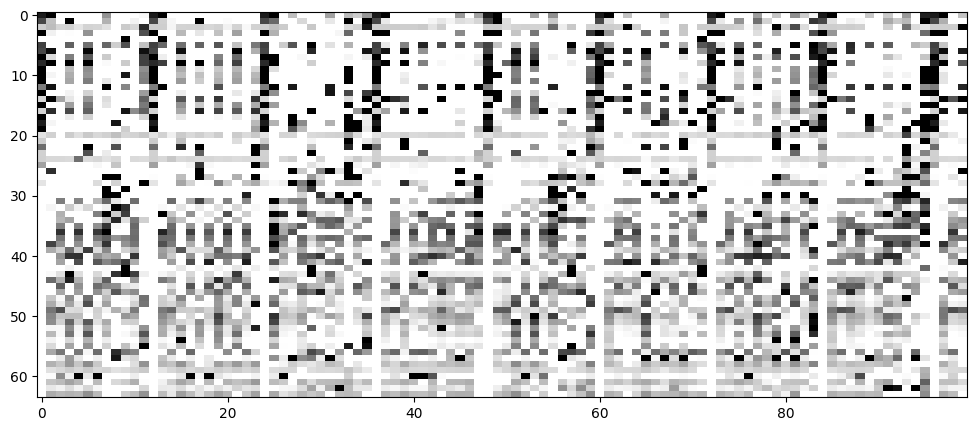

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap, utils
from scipy.stats import zscore

spks=hids.T
print(spks.shape)
spks = zscore(spks, axis=1)
spks=spks[:,:100]
# fit rastermap
model = Rastermap(n_PCs=10, n_clusters=5, 
                  locality=0.75, time_lag_window=5).fit(spks, compute_X_embedding=True)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")

(120, 64)


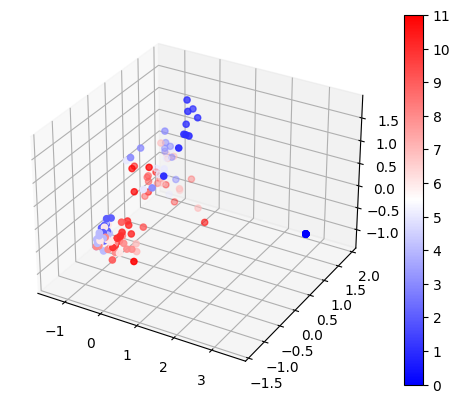

In [4]:
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=3, svd_solver='full')
#n_samples, n_features
print(hids.shape)
pcs=pca.fit_transform(hids)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import Normalize

# Create a repeating pattern of indices for colors
num_points = len(pcs)
cycle_length = 12
indices = np.arange(num_points) % cycle_length

# Normalize the indices to fit within the range of the colormap
norm = Normalize(vmin=0, vmax=cycle_length-1)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pcs[:, 0], pcs[:, 1], pcs[:, 2], c=indices, cmap='bwr', norm=norm)
plt.colorbar(scatter, ticks=range(cycle_length))
plt.show()

In [5]:
from experiments import experiments
from agents import DQNAgent
from environments import DelaySampleToMatchEnv
from eval_scripts import prepare_data
import numpy as np
import matplotlib.pyplot as plt


def move_tuple_to_device(hidden_tuple, device):
    return (hidden_tuple[0].to(device), hidden_tuple[1].to(device))


experiment = experiments[('short-seq', 'cifar10-seq', 'MSELoss', 'LSTM')]
env = DelaySampleToMatchEnv(n_stimuli=experiment['action_size'] - 1)
agent = DQNAgent(experiment)

agent.load_model('eval')

agent.epsilon = 0.00

print(agent.q_network)

n_episodes = 10
win_pct_list = []
scores = []
hids = []

train_data, class_dct = prepare_data()

for i in range(n_episodes):
    done = False
    state = env.reset()  # Reset the environment
    indices = class_dct[int(state)]
    random_index = np.random.choice(indices)
    state = train_data[random_index].flatten()
    score = 0
    hidden = agent.q_network.init_hidden()
    if isinstance(hidden, tuple):
        hidden = move_tuple_to_device(hidden, agent.device)
    else:
        hidden = hidden.to(agent.device)
    while not done:
        action, next_hidden = agent.select_action(state, hidden)
        next_state, reward, done, info = env.step(action)  # Take the action
        indices = class_dct[int(next_state)]
        random_index = np.random.choice(indices)
        next_state = train_data[random_index].flatten()
        hidden = next_hidden
        # hids.append(hidden)
        state = next_state  # Move to the next state
        score += reward
        if isinstance(hidden, tuple):
            hids.append(hidden[1].detach().cpu().numpy())
        else:
            hids.append(hidden.detach().cpu().numpy())


hids = np.array(hids).squeeze(1).squeeze(1)
print(hids.shape)
print(hids)


LSTMQNetwork(
  (rnn): LSTM(10, 64)
  (fc): Linear(in_features=64, out_features=6, bias=True)
)
(120, 64)
[[ 4.6427976e-02 -9.9999452e-01  5.3619820e-04 ...  1.9870533e+00
   1.9165428e-04  9.9992025e-01]
 [-1.3909574e-03 -9.9999869e-01 -1.0000000e+00 ...  1.5280228e+00
   7.4333709e-04 -7.3242664e-01]
 [-2.5191918e-01 -1.0005869e+00 -3.5194731e-01 ...  1.5351464e+00
   1.7537781e-04 -5.4715625e-03]
 ...
 [ 2.9256631e-02 -2.0557664e-02 -9.9989730e-01 ...  3.7094376e+00
   1.0004994e+00 -1.6605381e-02]
 [-2.7885059e-01 -1.0000069e+00  2.3266083e-01 ...  3.7124195e+00
   1.5003850e+00  1.8349662e-01]
 [-9.9433613e-01 -9.4573420e-01 -9.0353012e-01 ...  3.7812376e+00
   1.6261114e+00 -1.7312588e-03]]


(64, 120)
2024-07-24 17:02:15,309 [INFO] normalizing data across axis=1
2024-07-24 17:02:15,309 [INFO] projecting out mean along axis=0
2024-07-24 17:02:15,310 [INFO] data normalized, 0.00sec
2024-07-24 17:02:15,311 [INFO] sorting activity: 64 valid samples by 100 timepoints
2024-07-24 17:02:15,316 [INFO] n_PCs = 10 computed, 0.01sec
2024-07-24 17:02:15,327 [INFO] 5 clusters computed, time 0.02sec
2024-07-24 17:02:15,337 [INFO] clusters sorted, time 0.03sec
2024-07-24 17:02:15,361 [INFO] clusters upsampled, time 0.05sec
2024-07-24 17:02:15,363 [INFO] rastermap complete, time 0.05sec


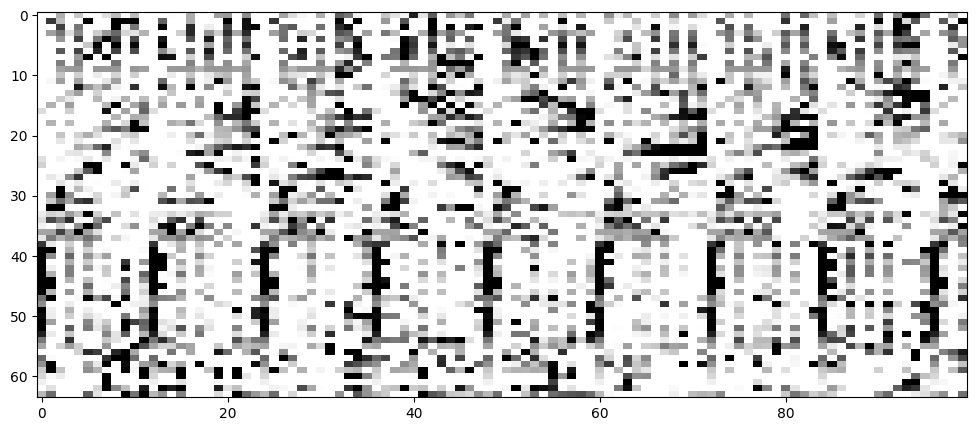

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from rastermap import Rastermap, utils
from scipy.stats import zscore

spks=hids.T
print(spks.shape)
spks = zscore(spks, axis=1)
spks=spks[:,:100]
# fit rastermap
model = Rastermap(n_PCs=10, n_clusters=5, 
                  locality=0.75, time_lag_window=5).fit(spks, compute_X_embedding=True)
y = model.embedding # neurons x 1
isort = model.isort

# visualize binning over neurons
X_embedding = model.X_embedding

# plot
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")